*K-Nearest Neighbor (KNN)* is a very simple, versatile and one of the most frequently used ML algorithms. KNN is used in a variety of applications, like finance, healthcare, political science, image and video recognition. KNN algorithm is used for both classification and regression problems.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant(*k-nearest neighbor* learning) or vary based on the local density of points(*Kernel Density Estimation* methods). 

# KNN Classification

Neighbors-based classification is a type of *instance-based learning* or *non-generalizing learning*: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

<img src="../data/KNN.png"> </img>

`scitkit-learn` implements two different nearest neighbor classifiers: `KNeighborsClassifier` implements learning based on the $k$ nearest neighbors of each query point. `RadiusNeighborsClassifier` implements learning based on the number of neighbors within a fixed radius $r$ of each training point, where $r$ is user-specified.

In cases where the data is not uniformyl sampled, radius-based neighbors classification in `RadiusNeighborsClassifer` can be a better choice. The user specifies a fixed radius $r$, such that points in sparser neighborhoods use fewer nearest neighbors for classification.

The basic nearest neighbor classification uses uniform weights, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. The default value, `weights = 'uniform'`, assigns uniform weights to each neighbor. Under some circumstances, weighted neighbors can be a better fit. `weights = 'distance'` assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function can be supplied to compute the weights.

Lets now see a demo.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn import neighbors, datasets

In [2]:
# Plot properties.
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.titlesize'] = 20

In [3]:
# Load good-ol iris dataset.
iris = datasets.load_iris()

In [4]:
# Lets look at the dataframe.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


For demo purposes, we will take only the first two features, that is **sepal length** and **sepal width**.

In [5]:
X = iris.data[:, :2]
y = iris.target

In [6]:
# Number of classes: 3
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Uniform weights

In [7]:
# Specify number of neighbors.
n_neighbors = 20

# Step size in the mesh. For visualization purpose.
stepSize = .1

In [8]:
trainer = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
trainer.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

Let us plot the decision boundary. 

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize),
                         np.arange(y_min, y_max, stepSize))

In [10]:
Z = trainer.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 2, 2, 2])

In [11]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'darkblue'])

Text(0.5, 1.0, "3-Class Classification neighbors=20, weights='uniform'")

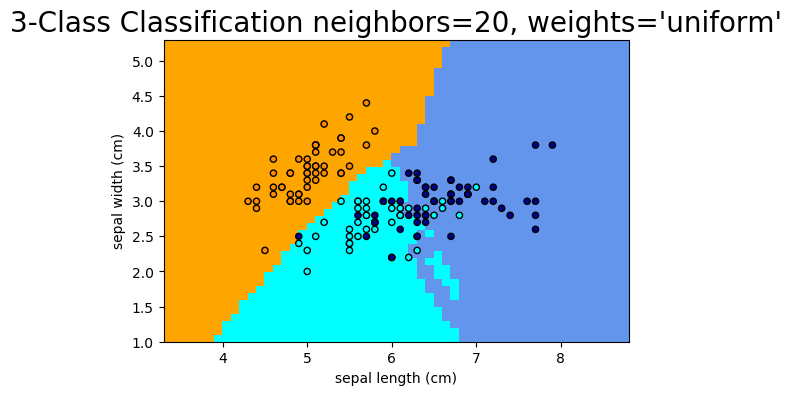

In [12]:
# Put the decision boundary into a color plot
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Next, add the training points.
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k',s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'3-Class Classification neighbors={n_neighbors}, weights=\'uniform\'')

<div class="alert alert-warning">
    <b> WARNING: </b>
     
   <ul>
    <li> KNN algorithms degrade with high dimensional data. More the number of dimensions more difficult it is for the algorithm to caculate distances in each dimension. </li>
    <li> KNN algorithms suffer with large number of data points, specially with dense population. Since we are calculating distance for each query point from its neighbors, time complexity increases proportionally with more data points. </li>
    <li> KNN is sensitive to outliers (missing values). To get better performance, outliers need to be imputed before applying KNN classification.</li>
   </ul>
</div>

<div class="alert alert-success">
    <b> EXCERCISE: </b>
    
   <ul>
    <li> Repeat the same experiment with <font color="color:red"> RadiusNeighborsClassifier </font> and analyze the results.</li>
    <li> Change the value of radius to get different decision boundaries.</li>
   </ul>
</div>

# KNN Regression

Neighbors-based regression can be used in cases where the data labels are *continuous* rather than *discrete variables*. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

scitkit-learn implements two different nearest neighbor regressors: `KNeighborsRegressor` implements learning based on the  𝑘  nearest neighbors of each query point. `RadiusNeighborsRegressor` implements learning based on the number of neighbors within a fixed radius  𝑟  of each training point, where $𝑟$  is user-specified.

The basic nearest neighbor regressor uses uniform weights, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. The default value, `weights = 'uniform'`, assigns uniform weights to each neighbor. Under some circumstances, weighted neighbors can be a better fit. `weights = 'distance'` assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function can be supplied to compute the weights.

Let us now see a demo.

In [24]:
# Seed random generator for reproducibility.
np.random.seed(42)

In [75]:
# Generate toy data points.
X_train = np.sort(5 * np.random.rand(40,1), axis=0)
X_train

array([[0.07196744],
       [0.20364401],
       [0.22652005],
       [0.23001321],
       [0.35284374],
       [0.4891708 ],
       [0.5803632 ],
       [0.78218521],
       [0.81467214],
       [0.86600935],
       [0.8664716 ],
       [1.23865495],
       [1.25121449],
       [1.39966948],
       [1.77986339],
       [1.87306307],
       [1.99252367],
       [2.04476472],
       [2.09800031],
       [2.16925825],
       [2.36735885],
       [2.37086915],
       [2.45807938],
       [2.51568129],
       [2.74613332],
       [2.77177026],
       [3.05860373],
       [3.07925049],
       [3.12929958],
       [3.17546825],
       [3.21209639],
       [3.29346816],
       [3.30098688],
       [3.5182893 ],
       [3.57297961],
       [3.68948458],
       [3.78923055],
       [4.27730292],
       [4.28244921],
       [4.7743264 ]])

In [76]:
# Generate a toy test dataset.
X_test = np.linspace(0, 5, 100)[:,np.newaxis]
X_test.shape

(100, 1)

In [77]:
# Flatten the data.
y = np.sin(X_train).ravel()

# Add some noise.
y[::5] += 1 * (0.5 - np.random.rand(8))

In [86]:
# Number of neighbors
n_neighbors = 5

## Uniform weights

In [87]:
trainer = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')

trainer.fit(X_train, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [88]:
Z = trainer.predict(X_test)

Text(0.5, 1.0, "KNN Regression with neighbors=5, weight='uniform'")

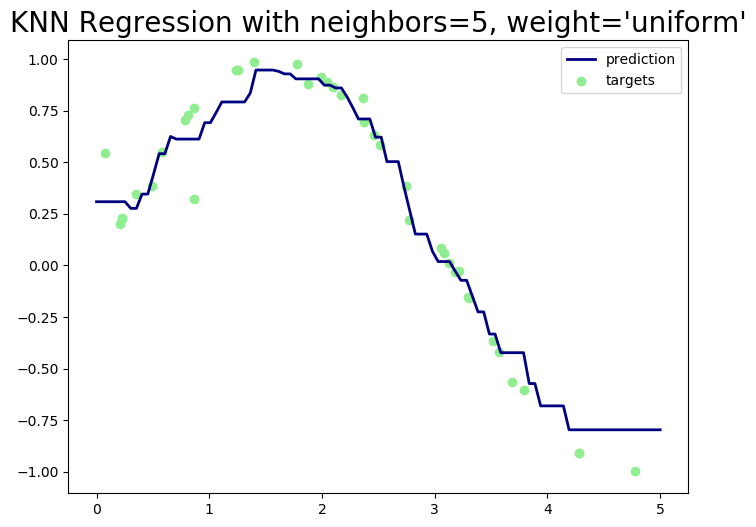

In [89]:
# Plot the results.
plt.figure(figsize=(8,6))
plt.scatter(X_train, y, color='lightgreen', label='targets')
plt.plot(X_test, Z, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title(f'KNN Regression with neighbors={n_neighbors}, weight=\'uniform\'')
# plt.tight_layout()

### Excercise

- Try `RadiusNeighborsRegressor` and report the results.
- Check the difference in targets and predictions. Calculate the **Root Mean Squared Error (RMSE)** on the test test.